In [1]:
# trying the "better" saved out version from the full flare list
# produced by make_better_a0_list.pro
# 
# 12-Dec-2024   IGH

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
from sunpy.io.special.genx import read_genx
from sunpy.time import parse_time
from astropy.time import Time

import warnings
warnings.simplefilter('ignore')

matplotlib.rcParams['font.size']=16

In [3]:
res=read_genx('bet_mfdata_a0gd.genx')
res=res["SAVEGEN0"]

In [4]:
# What are all the keys we have
for k in res.keys():
    print(k)

ID_NUM
START_TIME
END_TIME
PEAK_TIME
BK_TIMER
ENG_FOUND
ENG_HI
PEAK_CR
BACK_CR
TOT_C
POS
GOES_PK
FLAG_IDS
FLAGS


In [5]:
#  How many microflares in this list
print(f'Number of microflares in the list: {res["ID_NUM"].size:,}')

Number of microflares in the list: 60,427


In [6]:
# Convert from sswidl time format/anytim to more python times via sunpy parse_time!
test_time=parse_time(res['PEAK_TIME'][0], format='utime')
print(test_time)
print(test_time.iso)
print(test_time.decimalyear)

729728054.0
2002-02-14 22:14:14.000
2002.1230864408928


In [7]:
# And convert the whole array of times in one go
peak_time=parse_time(res['PEAK_TIME'], format='utime')

In [8]:
# Find the hard event again 6111704 17-Nov-2006 05:13:38
hid=np.where(res["ID_NUM"] == 6111704)
print(hid)
# Format of this odd due to list/array structure of flare list?
print(hid[0].flatten())
print(hid[0].flatten()[0])
# Check it returns the correct flare - though still as an array
print(res["ID_NUM"][hid])
print(peak_time[hid].iso)

(array([24229]),)
[24229]
24229
[6111704]
['2006-11-17 05:13:38.000']


In [9]:
# Split the positions into two arrays, instead of an array of arrays
fposx=[f[0] for f in res["POS"]]
fposy=[f[1] for f in res["POS"]]

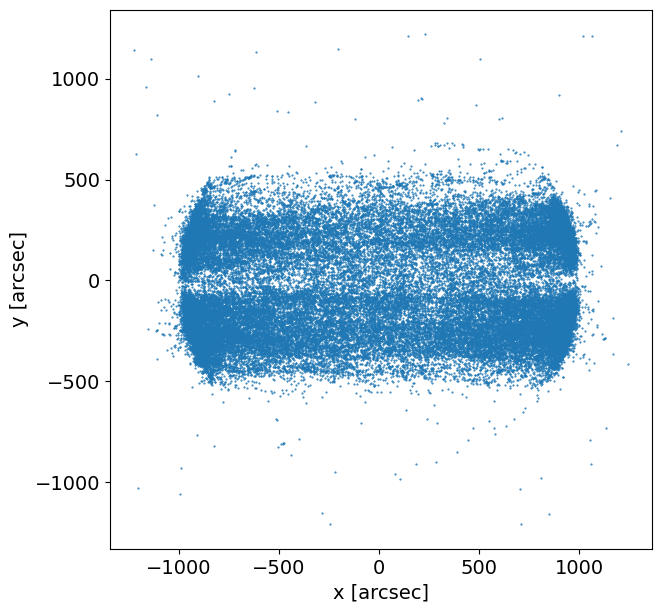

In [10]:
# Plot to check they look like expected
matplotlib.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(7, 7))
plt.plot(fposx,fposy,marker='.',ms=1,ls='None')
plt.xlabel('x [arcsec]')
plt.ylabel('y [arcsec]')
plt.show()

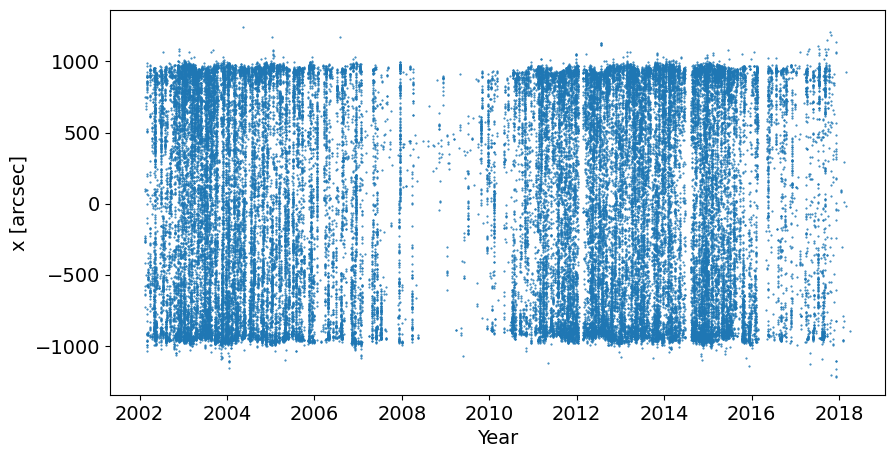

In [11]:
# Plot to check they look like expected
matplotlib.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(10, 5))
plt.plot(peak_time.decimalyear,fposx,marker='.',ms=1,ls='None')
plt.xlabel('Year')
plt.ylabel('x [arcsec]')
plt.show()

In [12]:
# The flags are stored but already filtered out a lot of "bad" events
# see make_better_a0_list.pro
# What are the flags?
print(res["FLAG_IDS"])

['00__SAA_AT_START' '01__SAA_AT_END' '02__SAA_DURING_FLARE'
 '03__ECLIPSE_AT_START' '04__ECLIPSE_AT_END' '05__ECLIPSE_DURING_FLARE'
 '06__NON_SOLAR' '07__FRONT_DECIMATION' '08__ATT_STATE_AT_PEAK'
 '09__DATA_GAP_AT_START' '10__DATA_GAP_AT_END' '11__DATA_GAP_DURING_FLARE'
 '12__PARTICLE_EVENT' '13__DATA_QUALITY' '14__POSITION_QUALITY'
 '15__ATTEN_0' '16__ATTEN_1' '17__ATTEN_2' '18__ATTEN_3'
 '19__REAR_DECIMATION' '20__MAGNETIC_REGION' '21__IMAGE_STATUS'
 '22__SPECTRUM_STATUS' '23__SOLAR_UNCONFIRMED' '24__SOLAR'
 '25__NEAR_SPIN_AXIS' '26__NOMATCH_WITH_FSIMG' '27__USED_AIA_POSITION'
 '28__ASPECT_GAP']


In [13]:
# Check that removed any SAA flag during the flare
# Here working out saa_start + saa_end + saa_during, so if non-zero something happend to saa
saa_sum=np.array([s[0]+s[1]+s[2] for s in res["FLAGS"]])
# Check that removed any eclipse flag during the flare
# Here working out eclp_start + eclp_end + eclp_during, so if non-zero something happend to eclipse
eclp_sum=np.array([s[3]+s[4]+s[5] for s in res["FLAGS"]])

bad_saa=np.where(saa_sum > 0.0)
bad_eclp=np.where(eclp_sum > 0.0)
print(f'How many microflares with saa changes: {bad_saa[0].size:,}')
print(f'How many microflares with eclipse changes: {bad_eclp[0].size:,}')

How many microflares with saa changes: 0
How many microflares with eclipse changes: 0


In [14]:
# With some added info from the LHH work
res_lhh=read_genx('bet_mfdata_a0gd_lhh.genx')
res_lhh=res_lhh["SAVEGEN0"]
for k in res_lhh.keys():
    print(k)

ID_NUM
START_TIME
END_TIME
PEAK_TIME
BK_TIMER
ENG_FOUND
ENG_HI
PEAK_CR
BACK_CR
TOT_C
POS
GOES_PK
FLAG_IDS
FLAGS
LHH_ID_NUM
LHH_BSGES
LHH_X
LHH_Y
LHH_LAT
LHH_LNG


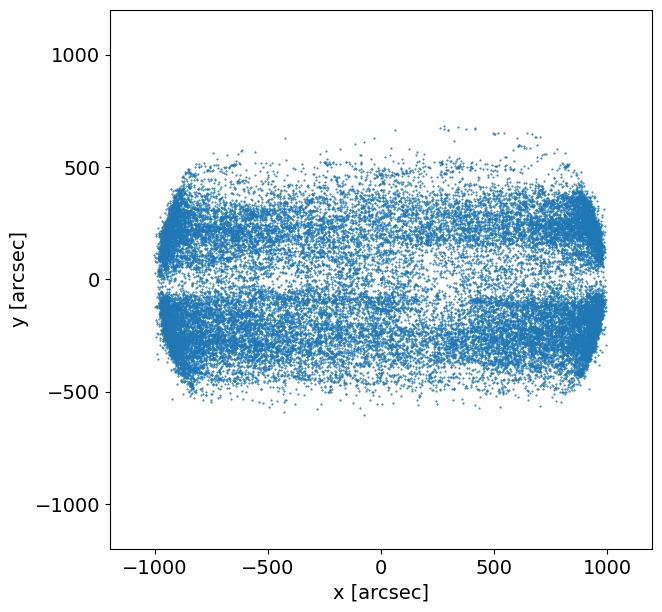

In [15]:
# Plot to check they look like expected
matplotlib.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(7, 7))
plt.plot(res_lhh["LHH_X"],res_lhh["LHH_Y"],marker='.',ms=1,ls='None')
plt.xlabel('x [arcsec]')
plt.ylabel('y [arcsec]')
plt.xlim([-1200,1200])
plt.ylim([-1200,1200])
plt.show()

How many microflares with LHH info: 35,650


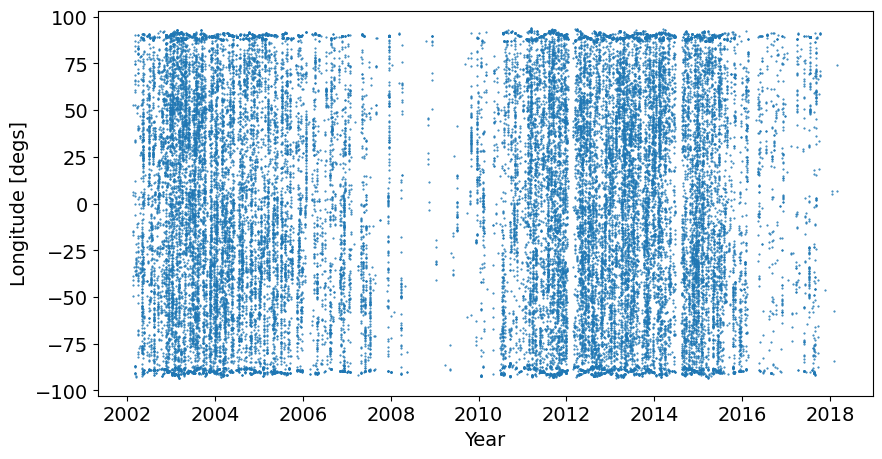

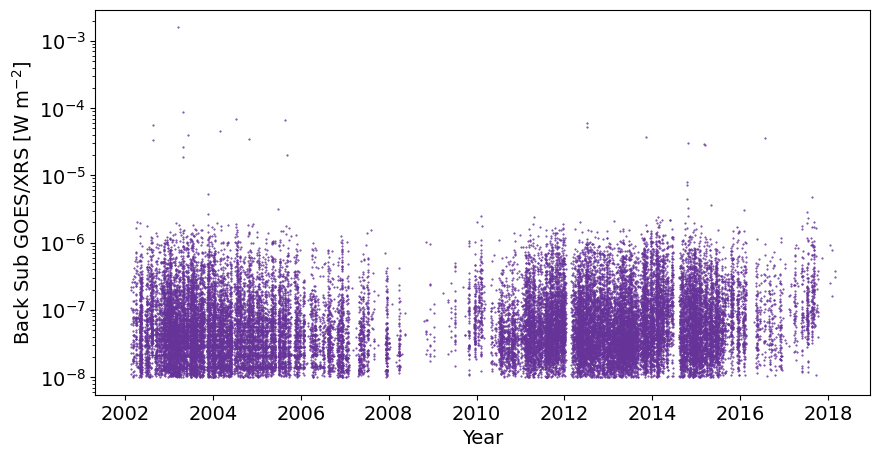

In [16]:
# Plot to check they look like expected
# Some full list events not in LHH so remove then
gdid=np.where(res_lhh["LHH_ID_NUM"] != 0)
print(f'How many microflares with LHH info: {gdid[0].size:,}')
matplotlib.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(10, 5))
plt.plot(peak_time[gdid].decimalyear,res_lhh["LHH_LNG"][gdid],marker='.',ms=1,ls='None')
plt.xlabel('Year')
plt.ylabel('Longitude [degs]')
plt.show()

fig = plt.figure(figsize=(10, 5))
plt.plot(peak_time[gdid].decimalyear,res_lhh["LHH_BSGES"][gdid],
marker='.',ms=1,ls='None',color='rebeccapurple')
plt.xlabel('Year')
plt.ylabel('Back Sub GOES/XRS [W m$^{-2}$]')
plt.yscale('log')
plt.show()

In [17]:
# Add in the extra GOES/XRS info for this newer list
# Made via get_goes_bsub.pro
gsn=read_genx('bet_mfdata_a0gd_ges.genx')
gsn=gsn["SAVEGEN0"]
# which contains the 1-8\AA GOES/XRS for
# ges_pk - the max value between RHESSI flare start and end time
# ges_pt - the value at the time of RHESSI 6-12 keV peak
# ges_bt - the mean value over the RHESSI flare background time (60s before start), 0s removed.
print(gsn.keys())
bsges=gsn["GES_PK"]-gsn["GES_BT"]

# Might be some dodgy values in there, either very large or 0...., 
# either due to GOES data missing/issues, or RHESSI flare not real or clear in XRS data

odict_keys(['GES_PK', 'GES_PT', 'GES_BT'])


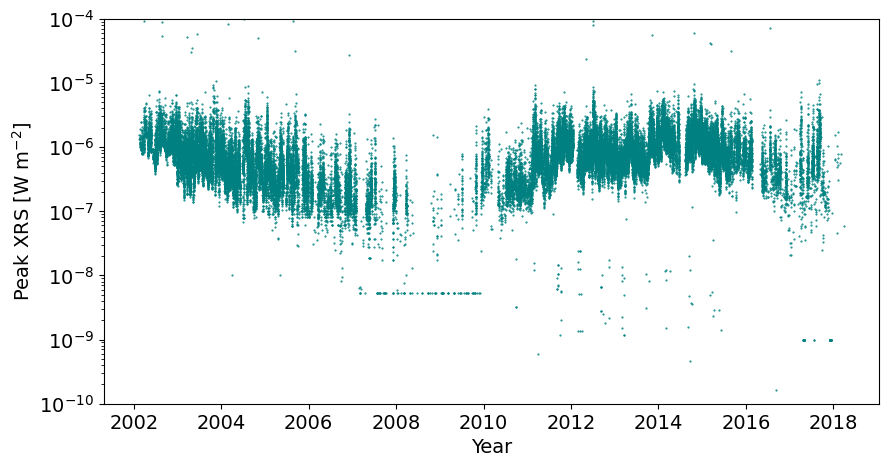

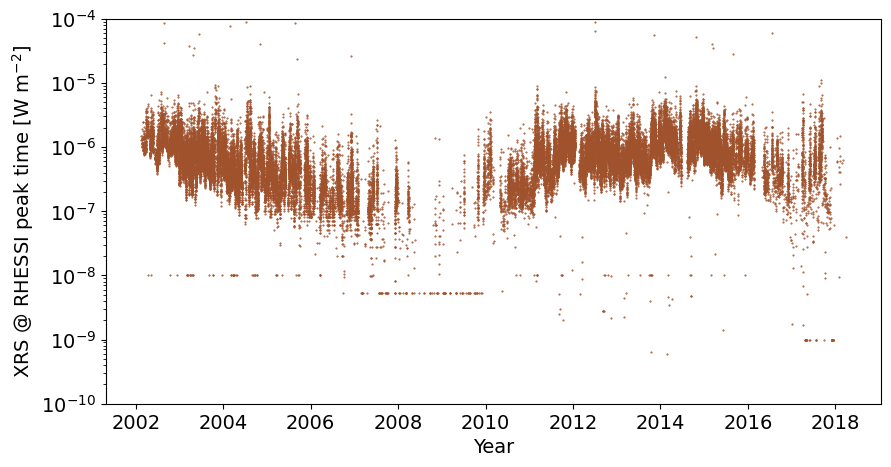

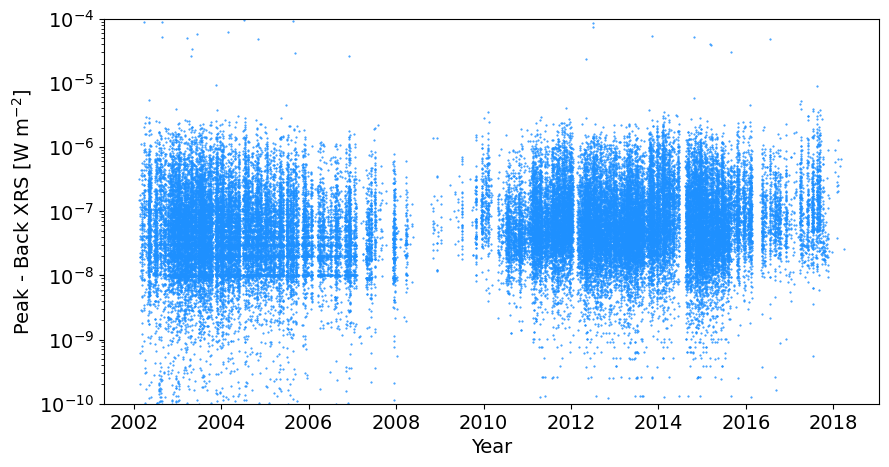

In [18]:
fig = plt.figure(figsize=(10, 5))
plt.plot(peak_time.decimalyear,gsn["GES_PK"],marker='.',ms=1,ls='None',color='teal')
plt.xlabel('Year')
plt.ylabel('Peak XRS [W m$^{-2}$]')
plt.yscale('log')
plt.ylim([1e-10,1e-4])
plt.show()
fig = plt.figure(figsize=(10, 5))
plt.plot(peak_time.decimalyear,gsn["GES_PT"],marker='.',ms=1,ls='None',color='sienna')
plt.xlabel('Year')
plt.ylabel('XRS @ RHESSI peak time [W m$^{-2}$]')
plt.yscale('log')
plt.ylim([1e-10,1e-4])
plt.show()
fig = plt.figure(figsize=(10, 5))
plt.plot(peak_time.decimalyear,bsges,marker='.',ms=1,ls='None',color='dodgerblue')
plt.xlabel('Year')
plt.ylabel('Peak - Back XRS [W m$^{-2}$]')
plt.yscale('log')
plt.ylim([1e-10,1e-4])
plt.show()